In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images to [0,1] and add channel dimension
x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

print("Training data shape:", x_train.shape, y_train_cat.shape)
print("Test data shape:", x_test.shape, y_test_cat.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28, 1) (60000, 10)
Test data shape: (10000, 28, 28, 1) (10000, 10)


In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images to [0,1] and add channel dimension
x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Check shapes
print("Training data shape:", x_train.shape, y_train_cat.shape)
print("Test data shape:", x_test.shape, y_test_cat.shape)


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [4]:
history = model.fit(
    x_train, y_train_cat,
    epochs=8,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 183ms/step - accuracy: 0.8803 - loss: 0.4158 - val_accuracy: 0.9292 - val_loss: 0.2334
Epoch 2/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 179ms/step - accuracy: 0.9800 - loss: 0.0656 - val_accuracy: 0.9903 - val_loss: 0.0355
Epoch 3/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 72s 171ms/step - accuracy: 0.9862 - loss: 0.0423 - val_accuracy: 0.9880 - val_loss: 0.0422
Epoch 4/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 74s 176ms/step - accuracy: 0.9886 - loss: 0.0347 - val_accuracy: 0.9913 - val_loss: 0.0331
Epoch 5/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 71s 168ms/step - accuracy: 0.9915 - loss: 0.0276 - val_accuracy: 0.9875 - val_loss: 0.0458
Epoch 6/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 71s 168ms/step - accuracy: 0.9920 - loss: 0.0233 - val_accuracy: 0.9878 - val_loss: 0.0436
Epoch 7/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 170ms/step - accuracy: 0.9927 - loss: 0.0223 - val_accuracy: 0.9915 - val_loss: 0.0361
Epoch 8/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 74s 175ms/step - accuracy: 0.9944 - loss: 0.0170 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9886 - loss: 0.0416
Test accuracy: 0.9905999898910522
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


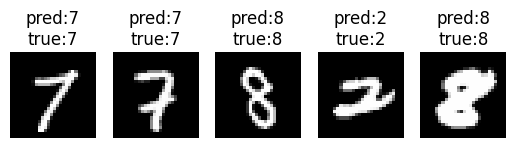

In [5]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print('Test accuracy:', test_acc)

# Visualize 5 random predictions
import random
idxs = random.sample(range(len(x_test)), 5)
preds = model.predict(x_test[idxs])
for i, idx in enumerate(idxs):
    plt.subplot(1,5,i+1)
    plt.axis('off')
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    plt.title(f"pred:{np.argmax(preds[i])}\ntrue:{y_test[idx]}")
plt.show()


In [6]:
print("Training data shape:", x_train.shape, y_train_cat.shape)
print("Test data shape:", x_test.shape, y_test_cat.shape)


Training data shape: (60000, 28, 28, 1) (60000, 10)
Test data shape: (10000, 28, 28, 1) (10000, 10)


In [7]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,872 (2.58 MB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 450,454 (1.72 MB)

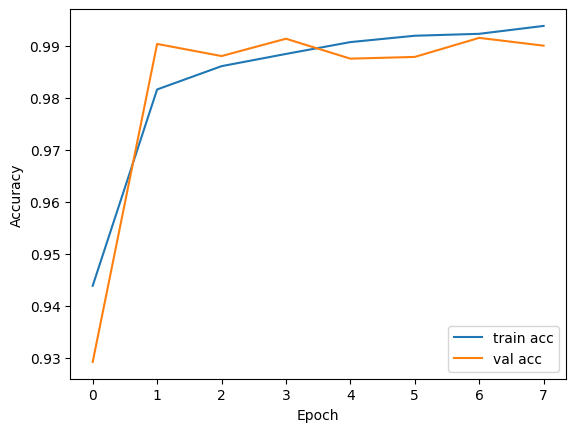

In [8]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
print('Test accuracy:', test_acc)


Test accuracy: 0.9905999898910522


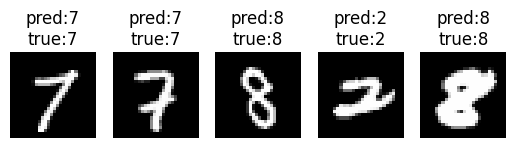

In [10]:
for i, idx in enumerate(idxs):
    plt.subplot(1,5,i+1)
    plt.axis('off')
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    plt.title(f"pred:{np.argmax(preds[i])}\ntrue:{y_test[idx]}")
plt.show()
